### Student Test Score Prediction 
--Kaggle

This notebook is for the playground competition in kaggle

The required installations:
1. pip install kaggle

In [1]:
import zipfile
from pathlib import Path

zip_path = Path(r"C:\Users\sriku\Desktop\projects\Student_Scores\playground-series-s6e1.zip")   
extract_to = Path(r"./")                  

extract_to.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzip complete")


Unzip complete


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
train_df=pd.read_csv('train.csv',index_col='id')
test_df=pd.read_csv('test.csv',index_col='id')

In [4]:
train_df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599


In [5]:
len(train_df),len(test_df)

(630000, 270000)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [7]:
train_df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [8]:
train_df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

(array([73188., 75632., 78885.,     0., 80742., 86620.,     0., 74950.,
        82872., 77111.]),
 array([17. , 17.7, 18.4, 19.1, 19.8, 20.5, 21.2, 21.9, 22.6, 23.3, 24. ]),
 <BarContainer object of 10 artists>)

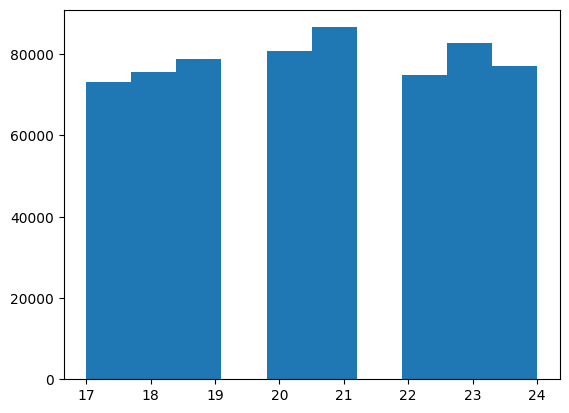

In [9]:
plt.hist(train_df.age)

In [10]:
train_df.gender.value_counts()

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

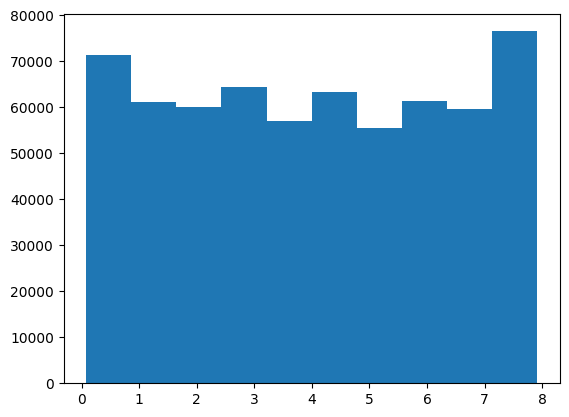

In [11]:
plt.hist(train_df.study_hours);

(array([64581., 60295., 61636., 65115., 47027., 64271., 60418., 63783.,
        67595., 75279.]),
 array([4.1 , 4.68, 5.26, 5.84, 6.42, 7.  , 7.58, 8.16, 8.74, 9.32, 9.9 ]),
 <BarContainer object of 10 artists>)

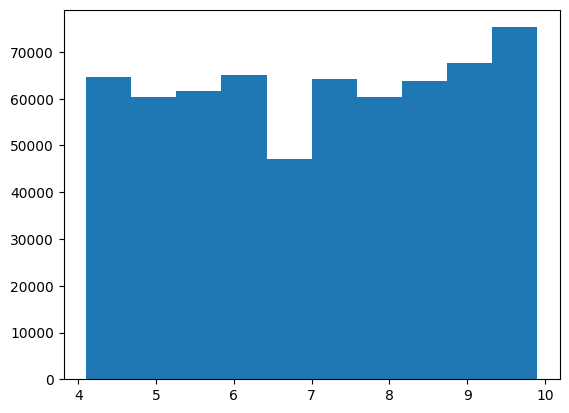

In [12]:
plt.hist(train_df.sleep_hours)

In [13]:
train_df.study_method.value_counts()

study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

In [14]:
train_df.exam_difficulty.value_counts()
# exam score vastly depends on the toughness of the exam, this is factual and lets see what the data holds for us: hypothesis testing

exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64

In [15]:
train_df.internet_access.value_counts()
# covariance with marks scored has to be testing to get to conclusions.

internet_access
yes    579423
no      50577
Name: count, dtype: int64

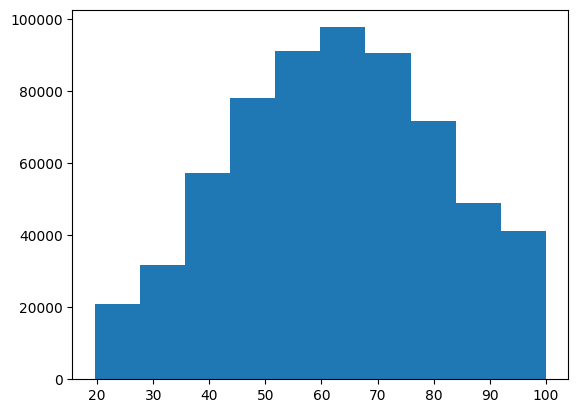

In [16]:
plt.hist(train_df.exam_score);

A nice normal distribution skewed towards right, rightfully so, could mean two things, either students are competent or the exam difficulty is mostly easy to medium -> which is the first impression.

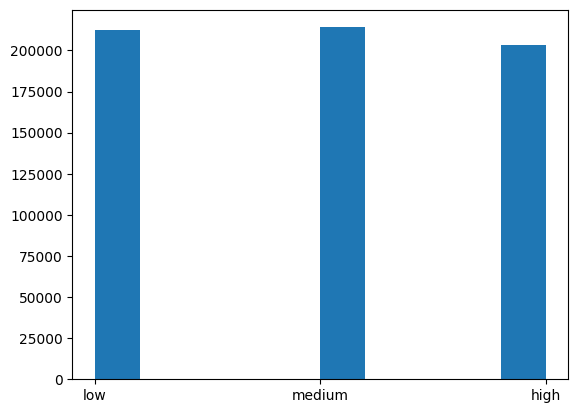

In [17]:
plt.hist(train_df.facility_rating);

In [18]:
train_df.course.value_counts()

course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

# Regression Problem

1. Feature engineering - numerical and categorical
2. model selection, increment- exploring all state of the art, from linear, polynomial, randomforest, catboost, neural networks

In [4]:
# feature engineering
dummies=train_df.select_dtypes(object).columns
dummies

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [5]:
df_encoded=pd.get_dummies(train_df,columns=dummies).astype(int)
df_encoded

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,course_b.sc,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,
0,21,7,98,4,78,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,18,4,94,4,46,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,20,4,92,5,99,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,19,2,49,8,63,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,23,7,86,9,100,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,4,69,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
629996,21,7,54,4,78,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
629997,24,0,44,4,19,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [6]:
df_encoded.columns

Index(['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score',
       'gender_female', 'gender_male', 'gender_other', 'course_b.com',
       'course_b.sc', 'course_b.tech', 'course_ba', 'course_bba', 'course_bca',
       'course_diploma', 'internet_access_no', 'internet_access_yes',
       'sleep_quality_average', 'sleep_quality_good', 'sleep_quality_poor',
       'study_method_coaching', 'study_method_group study',
       'study_method_mixed', 'study_method_online videos',
       'study_method_self-study', 'facility_rating_high',
       'facility_rating_low', 'facility_rating_medium', 'exam_difficulty_easy',
       'exam_difficulty_hard', 'exam_difficulty_moderate'],
      dtype='object')

In [7]:
y=df_encoded.exam_score
df_encoded.drop(columns=["exam_score"],inplace=True)

In [8]:
df_encoded

,age,study_hours,class_attendance,sleep_hours,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,
0,21,7,98,4,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1,18,4,94,4,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,20,4,92,5,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,19,2,49,8,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,23,7,86,9,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,4,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
629996,21,7,54,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
629997,24,0,44,4,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# it has to be grid search given the internal Crossvalidation that it performs, returns the best model with hyperparameters

In [10]:
linRegressor=LinearRegression()

In [26]:
params={
    "positive":[True,False]
}

In [27]:
grid=GridSearchCV(
    estimator=linRegressor,
    param_grid=params,
    cv=5,
    scoring=None,
    n_jobs=-1
)
grid.fit(df_encoded,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LinearRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'positive': [True, False]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes a

In [28]:
linRegressor=grid.best_estimator_

In [29]:
linRegressor.fit(df_encoded,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
linRegressor.score(df_encoded,y)

0.7722986954037258

##### Model 2: Polynomail regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [12]:
pipe=Pipeline([
    ("polyFeat",PolynomialFeatures()),
    ("lr",LinearRegression())
])

In [13]:
params={
    "polyFeat__degree":[1,2,3,4],
    "polyFeat__include_bias":[False],
    "lr__fit_intercept":[True,False]
}

In [14]:
grid=GridSearchCV(
    pipe,
    params,
    cv=3,
    scoring=None,
    n_jobs=1
)
grid.fit(df_encoded,y)

KeyboardInterrupt: 

In [ ]:
polynomial_regressor=grid.best_estimator_

In [ ]:
polynomial_regressor=pipe

In [ ]:
polynomial_regressor.fit(df_encoded,y)
polynomial_regressor.score(df_encoded,y)

0.7729165359444641

##### Model 3: RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfRegressor=RandomForestRegressor()

In [ ]:
params={
    "n_estimators":[50,80],
    "max_depth":[None,10,20,30],
}

In [18]:
rfRegressor.fit(df_encoded,y)

KeyboardInterrupt: 

In [ ]:
rfRegressor.score(df_encoded,y)

In [ ]:
rf_Regressor=grid.best_estimator_
rf_Regressor.score(df_encoded,y)

##### Model 4: 